<a href="https://colab.research.google.com/github/victorrborges/ri_lab_02/blob/master/recinfo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import nltk
import re
import numpy as np
from nltk.tokenize import RegexpTokenizer
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

result = pd.read_csv('results.csv')

# Reproduza a tabela 4.1 do livro texto calculando as estatísticas para sua coleção

In [0]:
total_docs = result.text.count()
words = []
total_words = 0

tknz = RegexpTokenizer(r'(\b[A-Za-z][a-z]{2,27}\b)')

for text in result.text:
   words_aux = [word for word in tknz.tokenize(text.lower()) if len(word) >= 3 and not bool(re.search(r'\d', word))]
   words.extend(words_aux)
total_words = len(words)
word_freq = {}
word_freq = Counter(words)
voc_size = 0
words_occ_more_1000 = 0
words_occ_once = 0

voc_size = len(word_freq)
words_occ_more_1000 = len([freq for freq in word_freq.values() if freq > 1000])
words_occ_once = len([freq for freq in word_freq.values() if freq == 1])

first_column = ['Total documents', 'Total word occurrences', 'Vocabulary size', 'Words occurring > 1000 times', 'Words occurring once ']
second_column = [total_docs, total_words, voc_size, words_occ_more_1000, words_occ_once]
first_table = pd.DataFrame(data = {' ': first_column , '': second_column })
first_table.index += 1
first_table.style.hide_index()

,
Total documents,249
Total word occurrences,127127
Vocabulary size,17930
Words occurring > 1000 times,8
Words occurring once,8915


# Reproduza a tabela 4.2 do livro considerando as top-50 palavras mais frequentes de sua coleção

In [0]:
top = word_freq.most_common(50)

top_50 = pd.DataFrame(columns = ['Word', 'Freq.', 'r', 'Pr(%)', 'r.Pr'])

top_50['Word'] = [word[0] for word in top]
top_50['Freq.'] = [word[1] for word in top]
top_50['r'] = [rank+1 for rank in range(0, len(top))]
top_50['Pr(%)'] = [round((word[1] / total_words)*100, 2) for word in top]
top_50['r.Pr'] = round((top_50['Pr(%)']/100)*top_50['r'], 3)

top_50.index += 1
top_50

,Word,Freq.,r,Pr(%),r.Pr
1,que,6554,1,5.16,0.052
2,para,2323,2,1.83,0.037
3,uma,2224,3,1.75,0.053
4,com,2200,4,1.73,0.069
5,por,1350,5,1.06,0.053
6,como,1329,6,1.05,0.063
7,mais,1206,7,0.95,0.066
8,dos,1062,8,0.84,0.067
9,mas,968,9,0.76,0.068
10,sua,813,10,0.64,0.064


# Plote curvas de rank-frequência (usando escala logarítmica) para palavras e bigramas na coleção que você coletou na atividade anterior. Quais os melhores valores do parâmetro c para cada curva

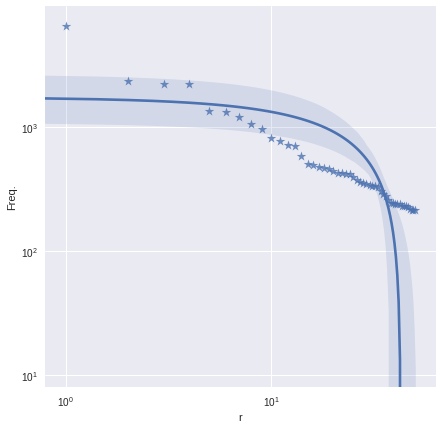

In [0]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("r", "Freq.", top_50, ax=ax, marker="*", scatter_kws={"s": 100})

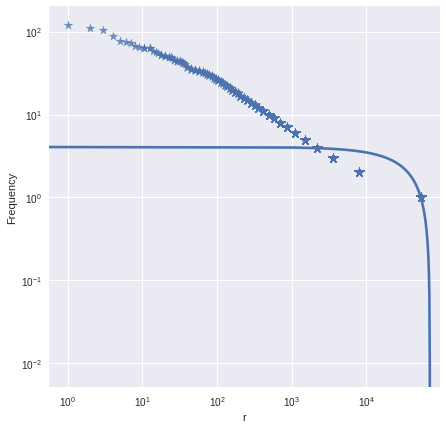

In [0]:
bigrams = []
bigrams = nltk.bigrams(words)
bigrams_freq = nltk.FreqDist(bigrams)
bigrams_df = pd.DataFrame(bigrams_freq.most_common(), columns=['word', 'Frequency'])
bigrams_df['r'] = bigrams_df['Frequency'].rank(ascending=False)

f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("r", "Frequency", bigrams_df, ax=ax, marker="*", scatter_kws={"s": 100})

# Reproduza a tabela 4.5 do livro texto considerando a sua coleção

In [0]:
prop_table = pd.DataFrame()
prop_table['Number of Occurrences (n)'] = word_freq.values() 
prop_table = prop_table.groupby(['Number of Occurrences (n)'])['Number of Occurrences (n)'].size().reset_index(name='Actual Number of Words')
prop_table['Predicted Proportion (1/n(n+1))'] = round(1 / (prop_table['Number of Occurrences (n)']*(prop_table['Number of Occurrences (n)'] + 1)), 3)
prop_table['Actual Proportion'] = round(prop_table['Actual Number of Words'] / len(word_freq), 3)

prop_table = prop_table[['Number of Occurrences (n)', 'Predicted Proportion (1/n(n+1))', 'Actual Proportion', 'Actual Number of Words']]
prop_table.index += 1
prop_table.head(10)

,Number of Occurrences (n),Predicted Proportion (1/n(n+1)),Actual Proportion,Actual Number of Words
1,1,0.500,0.497,8915
2,2,0.167,0.163,2923
3,3,0.083,0.079,1412
4,4,0.050,0.050,896
5,5,0.033,0.035,625
6,6,0.024,0.023,409
7,7,0.018,0.018,324
8,8,0.014,0.015,267
9,9,0.011,0.012,220
10,10,0.009,0.011,199
